In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
test = pd.read_csv('../data/data/test.csv')

In [4]:
df1 = pd.read_csv('../Catboost_real_final_df_random_10241630_.csv')
df2 = pd.read_csv('../XGB_real_final_df_random_10241721_.csv')
df3 = pd.read_csv('../ft_transformer_v2_random_1023.csv')
df4 = pd.read_csv('../LGBM_real_final_df_random_10241717_.csv')

In [5]:
# 각각의 결과 추가
test['Catboost'] = df1['deposit']
test['XGB'] = df2['deposit']
test['ft_transformer'] = df3['deposit']
test['LGBM'] = df4['deposit']


# 1. 결과 확인

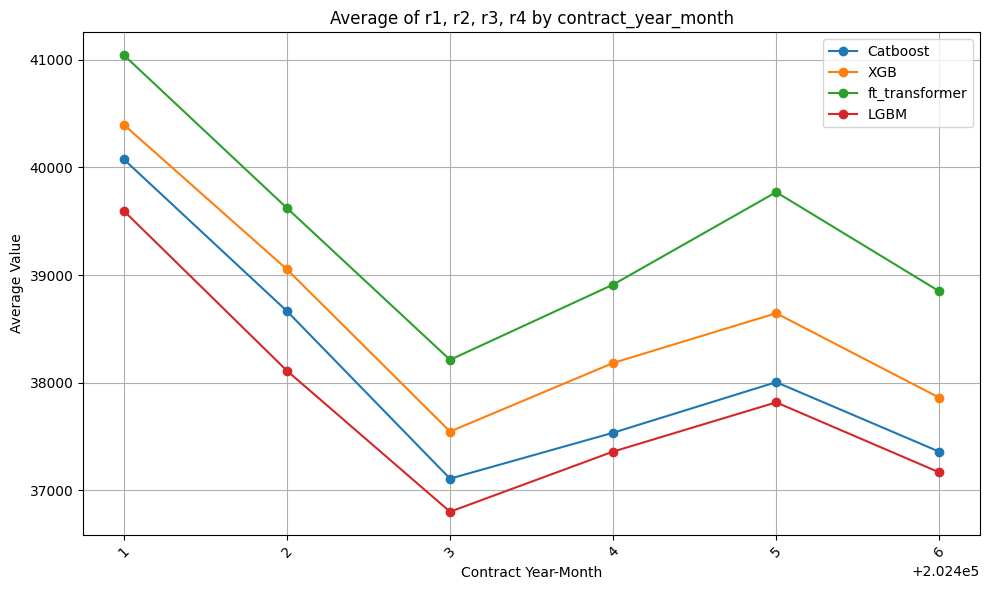

In [6]:
# contract_year_month별로 r1, r2, r3, r4의 평균을 구함
avg_values = test.groupby('contract_year_month')[['r1', 'r2', 'r3', 'r4']].mean()

plt.figure(figsize=(10, 6))

plt.plot(avg_values.index, avg_values['r1'], label='Catboost', marker='o')
plt.plot(avg_values.index, avg_values['r2'], label='XGB', marker='o')
plt.plot(avg_values.index, avg_values['r3'], label='ft_transformer', marker='o')
plt.plot(avg_values.index, avg_values['r4'], label='LGBM', marker='o')

plt.title('Average of r1, r2, r3, r4 by contract_year_month')
plt.xlabel('Contract Year-Month')
plt.ylabel('Average Value')
plt.xticks(rotation=45)  
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


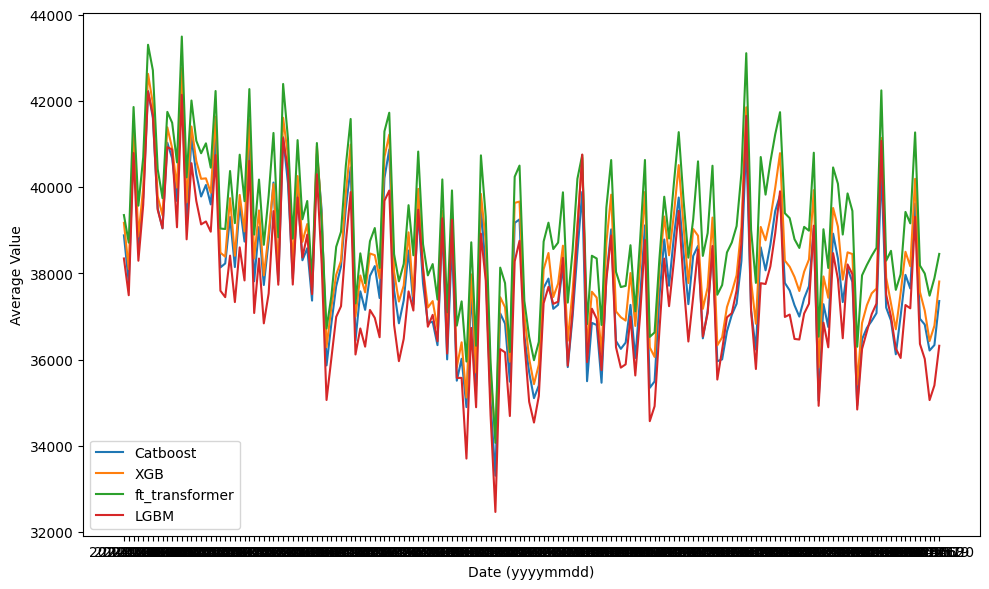

In [7]:
test['contract_year_month_day'] = test['contract_year_month'].astype(str) + test['contract_day'].astype(str).str.zfill(2)

avg_by_day = test.groupby('contract_year_month_day')[['r1', 'r2', 'r3', 'r4']].mean()

plt.figure(figsize=(10, 6))

plt.plot(avg_by_day.index, avg_by_day['r1'], label='Catboost')
plt.plot(avg_by_day.index, avg_by_day['r2'], label='XGB')
plt.plot(avg_by_day.index, avg_by_day['r3'], label='ft_transformer')
plt.plot(avg_by_day.index, avg_by_day['r4'], label='LGBM')

plt.xlabel('Date (yyyymmdd)')
plt.ylabel('Average Value')
plt.legend()
plt.tight_layout()

plt.show()


# 2. 날짜별 평균 기준

In [8]:
avg_by_day = test.groupby('contract_year_month_day')[['r1', 'r2', 'r3', 'r4']].mean()

weights = avg_by_day.div(avg_by_day.sum(axis=1), axis=0)

final_predictions = []

for i in range(len(test)):
    contract_day = test.loc[i, 'contract_year_month_day']
    r_values = test.loc[i, ['r1', 'r2', 'r3', 'r4']].values
    weight_for_day = weights.loc[contract_day].values
    final_pred = np.dot(r_values, weight_for_day)
    final_predictions.append(final_pred)

test['final_prediction'] = final_predictions

print(test[['contract_year_month_day', 'r1', 'r2', 'r3', 'r4', 'final_prediction']].head())


  contract_year_month_day            r1          r2          r3            r4  \
0                20240412  22009.961294  23234.8360  22033.9410  20897.722006   
1                20240413   8203.649602   7174.4004   6985.7163   7122.421256   
2                20240429   5773.829276   6087.9937   4801.9634   5633.091831   
3                20240503   6216.191517   6709.3584   4985.1514   6120.638850   
4                20240602   6733.170822   6690.3730   5324.6147   6085.129137   

   final_prediction  
0      22050.591732  
1       7366.849586  
2       5569.999535  
3       5998.090966  
4       6200.736204  


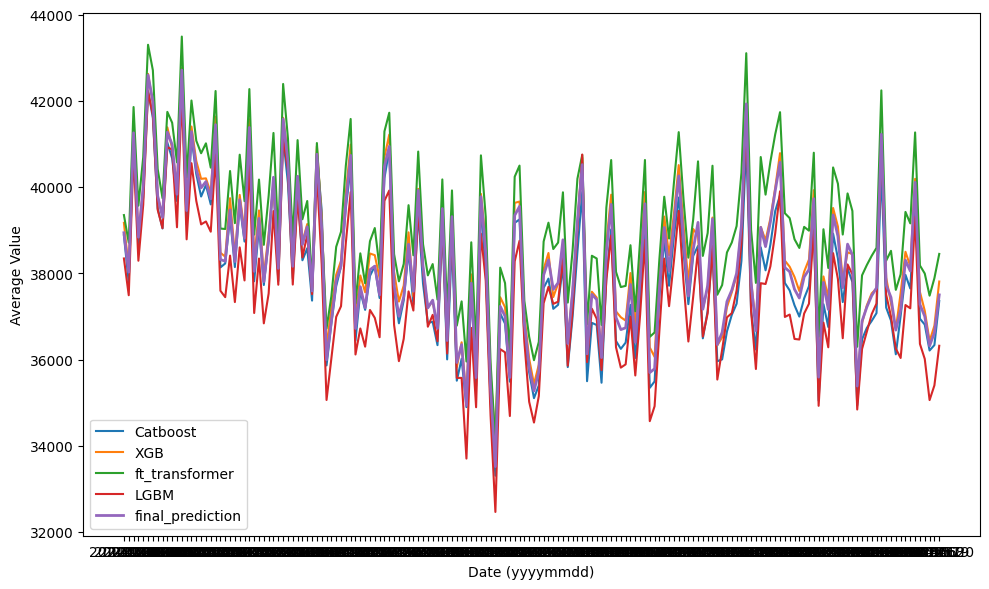

In [9]:
test['contract_year_month_day'] = test['contract_year_month'].astype(str) + test['contract_day'].astype(str).str.zfill(2)

avg_by_day = test.groupby('contract_year_month_day')[['r1', 'r2', 'r3', 'r4','final_prediction']].mean()

plt.figure(figsize=(10, 6))

plt.plot(avg_by_day.index, avg_by_day['r1'], label='Catboost')
plt.plot(avg_by_day.index, avg_by_day['r2'], label='XGB')
plt.plot(avg_by_day.index, avg_by_day['r3'], label='ft_transformer')
plt.plot(avg_by_day.index, avg_by_day['r4'], label='LGBM')
plt.plot(avg_by_day.index, avg_by_day['final_prediction'], label='final_prediction',linewidth=2)

plt.xlabel('Date (yyyymmdd)')
plt.ylabel('Average Value')
plt.legend()
plt.tight_layout()

plt.show()


In [10]:
final = test[['index', 'final_prediction']].rename(columns={'final_prediction': 'deposit'})
final

,index,deposit
0,0,22050.591732
1,1,7366.849586
2,2,5569.999535
3,3,5998.090966
4,4,6200.736204
...,...,...
150167,150167,38100.288145
150168,150168,42546.942739
150169,150169,44693.628199
150170,150170,37517.770749


In [11]:
final.to_csv('../mean_ensemble.csv')

# 3. 날짜별 표준편차 기준

In [16]:
std_by_day = test.groupby('contract_year_month_day')[['r1', 'r2', 'r3', 'r4']].std()

weights = std_by_day.div(std_by_day.sum(axis=1), axis=0)

final_predictions = []

for i in range(len(test)):
    contract_day = test.loc[i, 'contract_year_month_day']
    r_values = test.loc[i, ['r1', 'r2', 'r3', 'r4']].values
    weight_for_day = weights.loc[contract_day].values
    final_pred = np.dot(r_values, weight_for_day)
    final_predictions.append(final_pred)

test['final_prediction'] = final_predictions

print(test[['contract_year_month_day', 'r1', 'r2', 'r3', 'r4', 'final_prediction']].head())


  contract_year_month_day            r1          r2          r3            r4  \
0                20240412  22009.961294  23234.8360  22033.9410  20897.722006   
1                20240413   8203.649602   7174.4004   6985.7163   7122.421256   
2                20240429   5773.829276   6087.9937   4801.9634   5633.091831   
3                20240503   6216.191517   6709.3584   4985.1514   6120.638850   
4                20240602   6733.170822   6690.3730   5324.6147   6085.129137   

   final_prediction  
0      22042.117180  
1       7361.210914  
2       5565.956788  
3       5991.225591  
4       6191.087799  


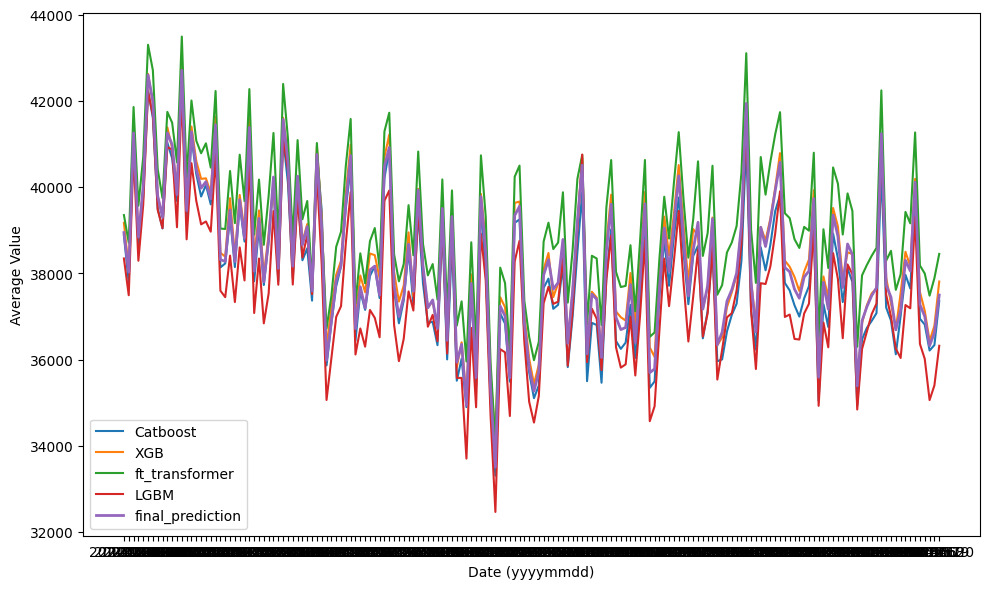

In [17]:
test['contract_year_month_day'] = test['contract_year_month'].astype(str) + test['contract_day'].astype(str).str.zfill(2)

avg_by_day = test.groupby('contract_year_month_day')[['r1', 'r2', 'r3', 'r4','final_prediction']].mean()

plt.figure(figsize=(10, 6))

plt.plot(avg_by_day.index, avg_by_day['r1'], label='Catboost')
plt.plot(avg_by_day.index, avg_by_day['r2'], label='XGB')
plt.plot(avg_by_day.index, avg_by_day['r3'], label='ft_transformer')
plt.plot(avg_by_day.index, avg_by_day['r4'], label='LGBM')
plt.plot(avg_by_day.index, avg_by_day['final_prediction'], label='final_prediction',linewidth=2)

plt.xlabel('Date (yyyymmdd)')
plt.ylabel('Average Value')
plt.legend()
plt.tight_layout()

plt.show()


In [14]:
final = test[['index', 'final_prediction']].rename(columns={'final_prediction': 'deposit'})
final

,index,deposit
0,0,12319.180926
1,1,3340.192846
2,2,3111.630320
3,3,2974.546425
4,4,2748.705562
...,...,...
150167,150167,21121.589056
150168,150168,20568.928761
150169,150169,19716.375440
150170,150170,18693.889572


In [15]:
final.to_csv('../std_ensemble.csv')